In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Make pandas dataframe with topographic data
df_top = xr.open_dataset("ETOPO_2022_v1_60s_N90W180_bed.nc") # Load in topography of the whole world
df_top = df_top.sel(lon=slice(134, 145), lat=slice(32, 40))  # Narrow our dataframe to Japan

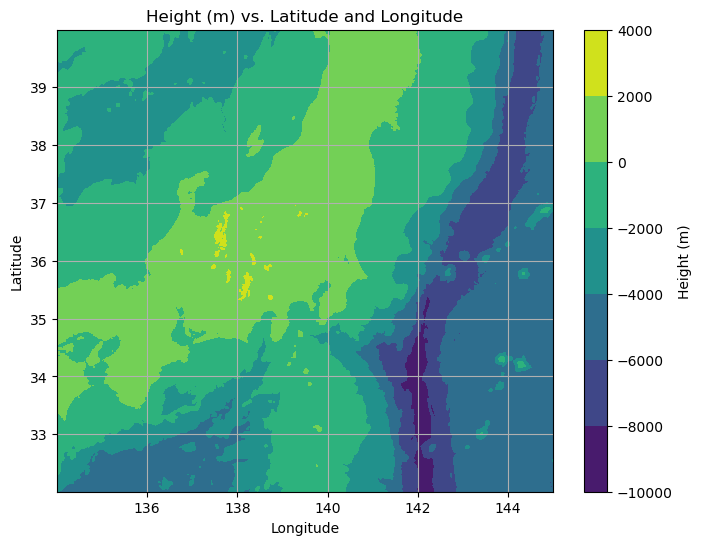

In [3]:
# Extract latitude and longitude coordinates
latitude = df_top.lat.values
longitude = df_top.lon.values

# Extract z values
z_values = df_top.z.values

# Plot the data
plt.figure(figsize=(8, 6))
plt.contourf(longitude, latitude, z_values, cmap='viridis')
plt.colorbar(label='Height (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Height (m) vs. Latitude and Longitude')
plt.grid(True)
plt.show()

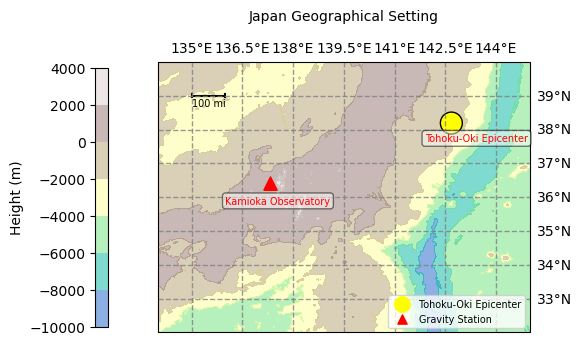

In [18]:
# Make final map

# Set projection type
proj = ccrs.PlateCarree()

# Make figure
plt.figure()
ax = plt.axes(projection=proj)
ax.set_title('Japan Geographical Setting', fontsize=10, pad=15)

# Set extent boundaries
extent = [134, 145, 32, 40]
ax.set_extent(extent)

# Add topography
y = df_top.lat.values
x = df_top.lon.values
z = df_top.z.values

contour = ax.contourf(x, y, z, cmap='terrain', alpha=0.5, transform=proj)
plt.colorbar(contour, ax=ax, label='Height (m)', orientation='vertical', pad=.1, shrink=0.7, location='left')

# make latitude and longitude gridlines
grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.8, linestyle='--')
grid.left_labels = False
grid.bottom_labels = False

# Add data points from dfs
ax.scatter(142.68, 38.19, color='yellow', marker='o', s=250, transform=proj, label="Tohoku-Oki Epicenter")
ax.scatter(142.68, 38.19, color='black', marker='o', s=250, facecolors='none')
ax.scatter(137.31, 36.43, color='red', marker='^', s=90, label="Gravity Station")

# Add labels
ax.text(136, 35.8, "Kamioka Observatory", fontsize=7, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))
ax.text(141.9, 37.65, "Tohoku-Oki Epicenter", fontsize=7, c="r", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=.5))

# Add scale bar
ax.plot([135, 136], [39, 39], color='k', transform=proj)
ax.plot([135, 135], [38.95, 39.05], color='k', transform=proj)
ax.plot([136, 136], [38.95, 39.05], color='k', transform=proj)
ax.text(135, 38.7, "100 mi", fontsize=7)

# Add legend
plt.legend(loc="lower right", fontsize="x-small", markerscale=.7)
plt.savefig("tohoku-oki_map")
plt.show()